# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url ='&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + 'appid=' + weather_api_key + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | mynamaki
Processing Record 4 of Set 1 | uturoa
Processing Record 5 of Set 1 | touros
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | kolpashevo
Processing Record 11 of Set 1 | nobres
Processing Record 12 of Set 1 | ghanzi
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | talusan
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | okhotsk
Processing 

Processing Record 41 of Set 4 | plainview
Processing Record 42 of Set 4 | saint-joseph
Processing Record 43 of Set 4 | acapulco de juarez
Processing Record 44 of Set 4 | santana
Processing Record 45 of Set 4 | isafjordur
Processing Record 46 of Set 4 | ejido benito juarez
City not found. Skipping...
Processing Record 47 of Set 4 | ust'-kulom
Processing Record 48 of Set 4 | kruisfontein
Processing Record 49 of Set 4 | masterton
Processing Record 0 of Set 5 | saint-pierre
Processing Record 1 of Set 5 | invercargill
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | la passe
Processing Record 4 of Set 5 | vilyuchinsk
Processing Record 5 of Set 5 | vallenar
Processing Record 6 of Set 5 | benoy-yurt
Processing Record 7 of Set 5 | utrik
Processing Record 8 of Set 5 | mitchell
Processing Record 9 of Set 5 | kapit
Processing Record 10 of Set 5 | extrema
Processing Record 11 of Set 5 | georgetown
Processing Record 12 of Set 5 | chonchi
Processing Record 13 of Set 5 | fisterra
P

Processing Record 28 of Set 8 | agaro
Processing Record 29 of Set 8 | sitia
Processing Record 30 of Set 8 | arraial do cabo
Processing Record 31 of Set 8 | tabas
Processing Record 32 of Set 8 | ploneour-lanvern
Processing Record 33 of Set 8 | bandar abbas
Processing Record 34 of Set 8 | al jawf
Processing Record 35 of Set 8 | hayma'
City not found. Skipping...
Processing Record 36 of Set 8 | chandler
Processing Record 37 of Set 8 | kalaswala
Processing Record 38 of Set 8 | vryburg
Processing Record 39 of Set 8 | el fasher
Processing Record 40 of Set 8 | imphal
Processing Record 41 of Set 8 | kupang
Processing Record 42 of Set 8 | kirensk
Processing Record 43 of Set 8 | goondiwindi
Processing Record 44 of Set 8 | nogliki
Processing Record 45 of Set 8 | acarau
Processing Record 46 of Set 8 | flin flon
Processing Record 47 of Set 8 | xai-xai
Processing Record 48 of Set 8 | tchintabaraden
Processing Record 49 of Set 8 | miami lakes
Processing Record 0 of Set 9 | long beach
Processing Recor

Processing Record 18 of Set 12 | hang dong
Processing Record 19 of Set 12 | ujae
Processing Record 20 of Set 12 | akureyri
Processing Record 21 of Set 12 | visby
Processing Record 22 of Set 12 | rupert
Processing Record 23 of Set 12 | yuzhno-kurilsk
Processing Record 24 of Set 12 | mansa
Processing Record 25 of Set 12 | ribeira brava
Processing Record 26 of Set 12 | floro
Processing Record 27 of Set 12 | boguchany
Processing Record 28 of Set 12 | roosevelt
Processing Record 29 of Set 12 | chibougamau
Processing Record 30 of Set 12 | jalali
Processing Record 31 of Set 12 | naxos
Processing Record 32 of Set 12 | marica
Processing Record 33 of Set 12 | sagaing
Processing Record 34 of Set 12 | medyn'
Processing Record 35 of Set 12 | maitum
Processing Record 36 of Set 12 | sosnytsya
Processing Record 37 of Set 12 | kinablangan
Processing Record 38 of Set 12 | plettenberg bay
Processing Record 39 of Set 12 | smithers
-----------------------------
Data Retrieval Complete      
---------------

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,270.96,74,0,1.54,AR,1690239082
1,mount gambier,-37.8333,140.7667,282.77,80,82,1.26,AU,1690239192
2,mynamaki,60.7446,22.0243,283.80,93,5,0.91,FI,1690239192
3,uturoa,-16.7333,-151.4333,299.97,81,16,6.75,PF,1690239192
4,touros,-5.1989,-35.4608,297.81,81,11,6.75,BR,1690239192


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,270.96,74,0,1.54,AR,1690239082
1,mount gambier,-37.8333,140.7667,282.77,80,82,1.26,AU,1690239192
2,mynamaki,60.7446,22.0243,283.80,93,5,0.91,FI,1690239192
3,uturoa,-16.7333,-151.4333,299.97,81,16,6.75,PF,1690239192
4,touros,-5.1989,-35.4608,297.81,81,11,6.75,BR,1690239192


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

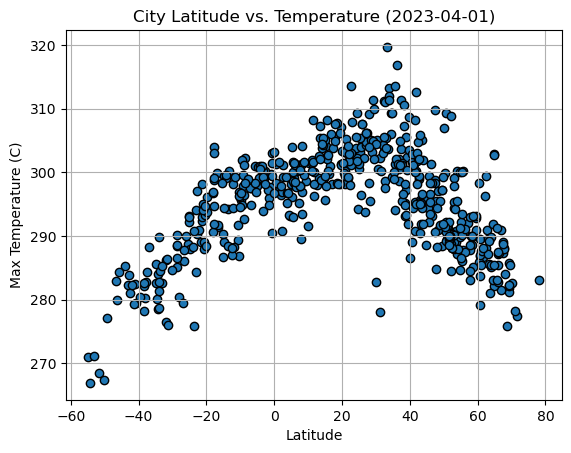

In [10]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Temperature (2023-04-01)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

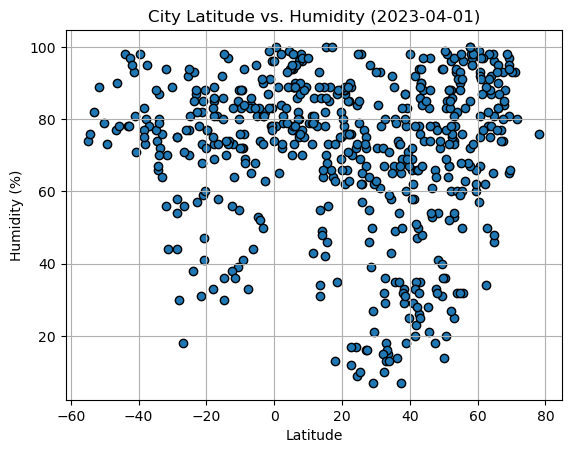

In [11]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-04-01)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

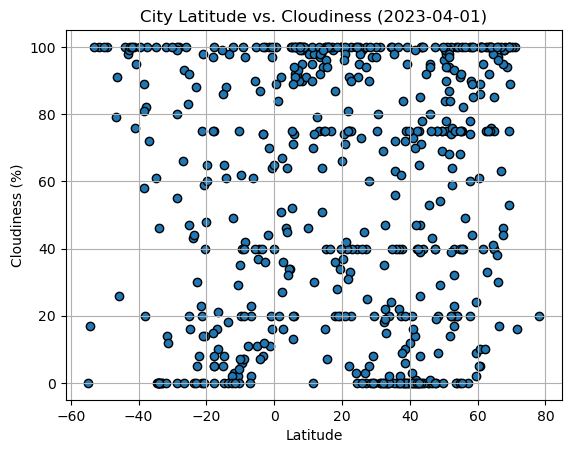

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-04-01)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

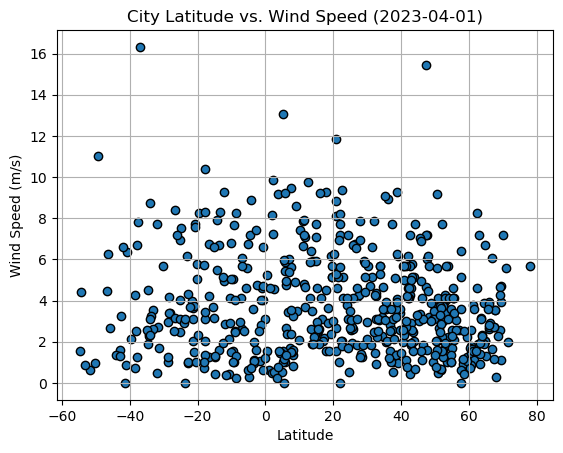

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-04-01)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mynamaki,60.7446,22.0243,283.80,93,5,0.91,FI,1690239192
5,yellowknife,62.4560,-114.3525,299.44,34,100,4.63,CA,1690239174
9,kolpashevo,58.3131,82.9089,288.66,95,44,1.12,RU,1690239193
12,fortuna,40.5982,-124.1573,294.66,69,20,5.66,US,1690239194
13,petropavlovsk-kamchatsky,53.0452,158.6483,294.48,53,20,4.00,RU,1690239194


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,270.96,74,0,1.54,AR,1690239082
1,mount gambier,-37.8333,140.7667,282.77,80,82,1.26,AU,1690239192
3,uturoa,-16.7333,-151.4333,299.97,81,16,6.75,PF,1690239192
4,touros,-5.1989,-35.4608,297.81,81,11,6.75,BR,1690239192
6,puerto natales,-51.7236,-72.4875,268.49,89,100,0.64,CL,1690239178


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.34986322874001197


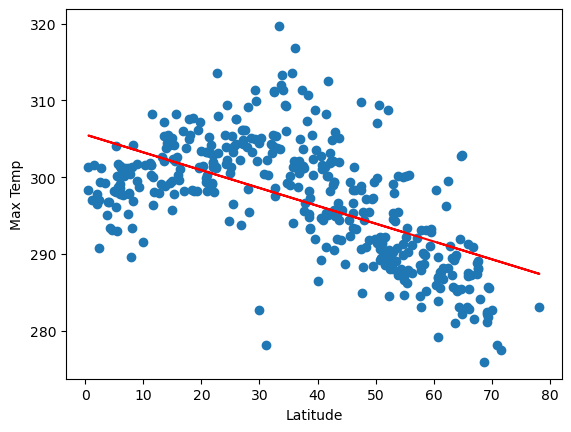

In [22]:
# Linear regression on Northern Hemisphere
north_x = northern_hemi_df['Lat']
north_y = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_val = north_x * slope + intercept
lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(north_x, north_y)
plt.plot(north_x,regress_val,"r-")
plt.annotate(lin_reg_eq,(5,-20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.7371658811900198


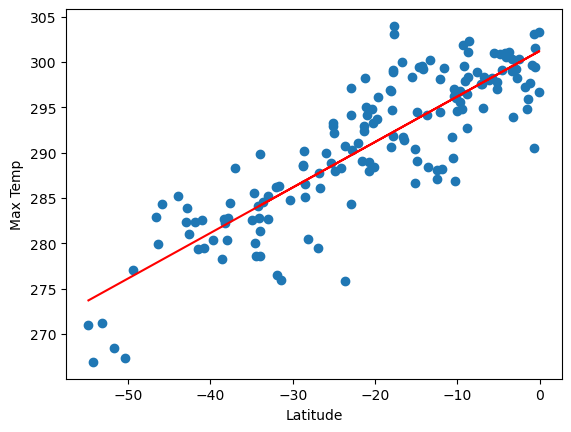

In [23]:
# Linear regression on Southern Hemisphere
south_x = southern_hemi_df['Lat']
south_y = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
s_regress_val = south_x * slope + intercept
s_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(south_x, south_y)
plt.plot(south_x,s_regress_val,"r-")
plt.annotate(s_lin_reg_eq,(-55,27),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')


print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 1.0435817087872888e-05


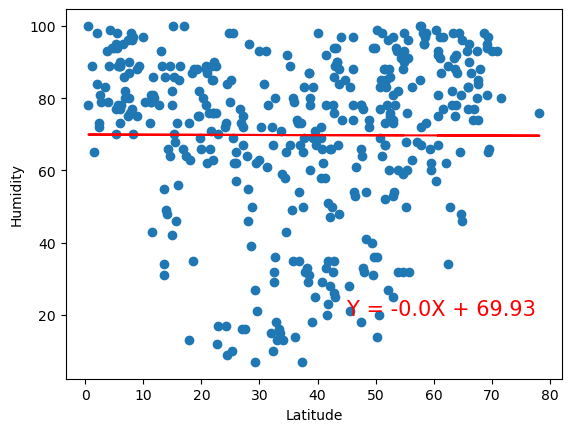

In [24]:
# Northern Hemisphere
h_north_x = northern_hemi_df['Lat']
h_north_y = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(h_north_x, h_north_y)
nh_regress_val = h_north_x * slope + intercept
nh_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(h_north_x, h_north_y)
plt.plot(h_north_x,nh_regress_val,"r-")
plt.annotate(nh_lin_reg_eq,(45,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.004396563979240077


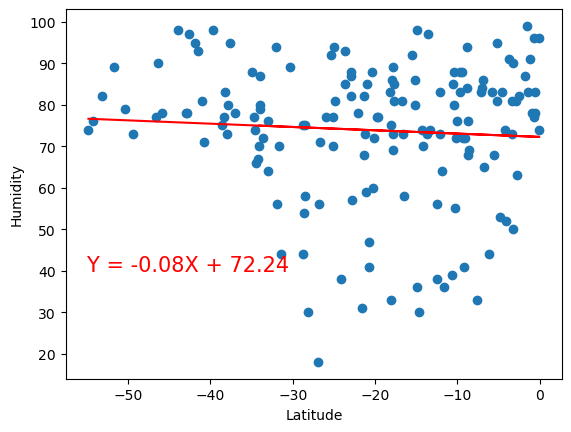

In [26]:
# Southern Hemisphere
h_south_x = southern_hemi_df['Lat']
h_south_y = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(h_south_x, h_south_y)
sh_regress_val = h_south_x * slope + intercept
sh_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(h_south_x, h_south_y)
plt.plot(h_south_x,sh_regress_val,"r-")
plt.annotate(sh_lin_reg_eq,(-55,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')


print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0038780545875293873


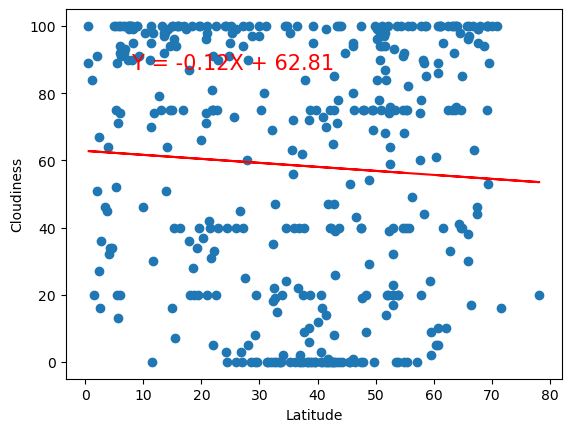

In [27]:
# Northern Hemisphere
c_north_x = northern_hemi_df['Lat']
c_north_y = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(c_north_x, c_north_y)
cn_regress_val = c_north_x * slope + intercept
cn_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(c_north_x, c_north_y)
plt.plot(c_north_x,cn_regress_val,"r-")
plt.annotate(cn_lin_reg_eq,(8,87),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.03924047780190467


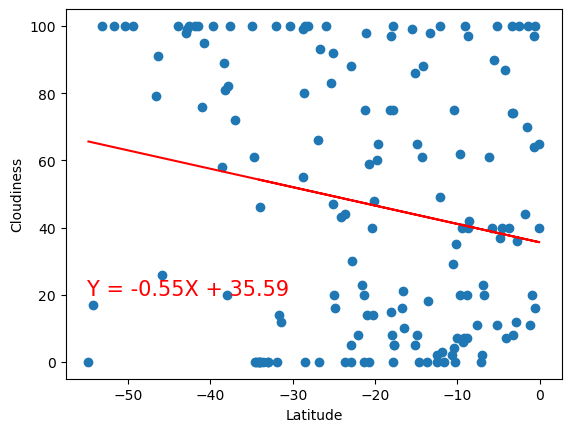

In [28]:
# Southern Hemisphere
c_south_x = southern_hemi_df['Lat']
c_south_y = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(c_south_x, c_south_y)
sc_regress_val = c_south_x * slope + intercept
sc_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(c_south_x, c_south_y)
plt.plot(c_south_x,sc_regress_val,"r-")
plt.annotate(sc_lin_reg_eq,(-55,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.038622236455322465


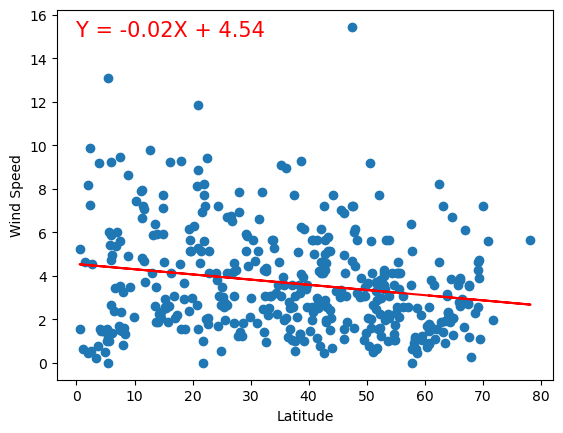

In [32]:
# Northern Hemisphere
w_northern_x = northern_hemi_df['Lat']
w_northern_y = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(w_northern_x, w_northern_y)
nw_regress_val = w_northern_x * slope + intercept
nw_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(w_northern_x, w_northern_y)
plt.plot(w_northern_x,nw_regress_val,"r-")
plt.annotate(nw_lin_reg_eq,(0,15),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 8.696596137806087e-06


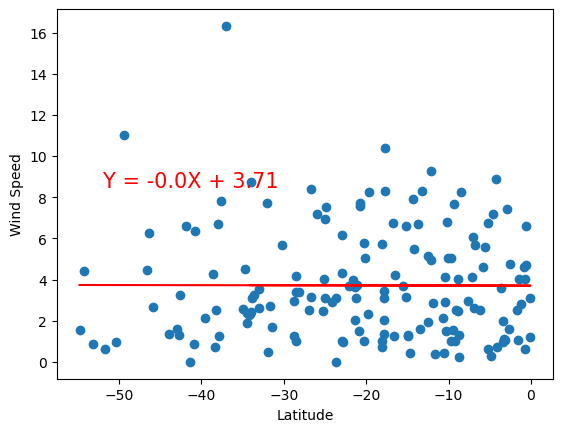

In [31]:
# Southern Hemisphere
w_southern_x = southern_hemi_df['Lat']
w_southern_y = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(w_southern_x, w_southern_y)
sw_regress_val = w_southern_x * slope + intercept
sw_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(w_southern_x, w_southern_y)
plt.plot(w_southern_x,sw_regress_val,"r-")
plt.annotate(sw_lin_reg_eq,(-52,8.5),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE